### Properly extend PATH to make imports work correctly.

In [1]:
import os
ROOT_PROJECT_DIR = os.path.join(*os.getcwd().split(os.sep)[:-1])
os.chdir("..")
ROOT_PROJECT_DIR

'home/said/Inno/PMLDL/assignment2/pmldl-rec-sys'

### Imports

In [2]:
import sys
if ROOT_PROJECT_DIR not in sys.path:
    sys.path.append(ROOT_PROJECT_DIR)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from benchmark.evaluate import evaluate
from models.svd_model import train
from utils.prepare_data import process_rating_table, create_custom_surprise_dataset, split_train_test

**Get ratings table to apply Collaborative filtering**

In [5]:
ratings = process_rating_table(os.path.join(os.sep, ROOT_PROJECT_DIR, "data", "raw", "u.data"))
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


**Create custom dataset to work with surprise library**

In [6]:
dataset = create_custom_surprise_dataset(ratings)

In [7]:
train_data, test_data = split_train_test(dataset, 0.2, 42)

**Specify the path to model checkpoint (to store or load)**

In [8]:
path_to_model = os.path.join(os.sep, ROOT_PROJECT_DIR, "models", "svd_saved.dump")

**Train the model (optionally)**

You can pass the path to checkpoint to evaluation function directly

In [9]:
model = train(
    train_dataset=train_data,
    dataset=dataset,
    use_grid_search=True,
    path_to_save=path_to_model,
)

start grid search


**Get evaluation results**

Three metrics are used here:
- Root Mean Square Error
- Precision at some k
- Recall at some k

We have 5 disjoint test groups. So we evaluate our model on each group and obtain results.

In [10]:
results = evaluate(path_to_model=path_to_model)

RMSE: 0.7371
1 test group:
RMSE = 0.7370891017102947
precision@5 = 0.857927049476345
recall@5 = 0.5252124468471762
########
RMSE: 0.7450
2 test group:
RMSE = 0.7449961298341093
precision@5 = 0.9196441539578806
recall@5 = 0.369478133431045
########
RMSE: 0.7365
3 test group:
RMSE = 0.7364991601273365
precision@5 = 0.8922919857069935
recall@5 = 0.4424239963911366
########
RMSE: 0.7315
4 test group:
RMSE = 0.7315425081500349
precision@5 = 0.8377022653721669
recall@5 = 0.5286067055028442
########
RMSE: 0.7288
5 test group:
RMSE = 0.7287505326342613
precision@5 = 0.8710970464135019
recall@5 = 0.5175925906063875
########


**Visualise results**

In [11]:
def create_stem_plot(x, y, ax, x_label, y_label, title):
    ax.stem(x,y)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    return ax

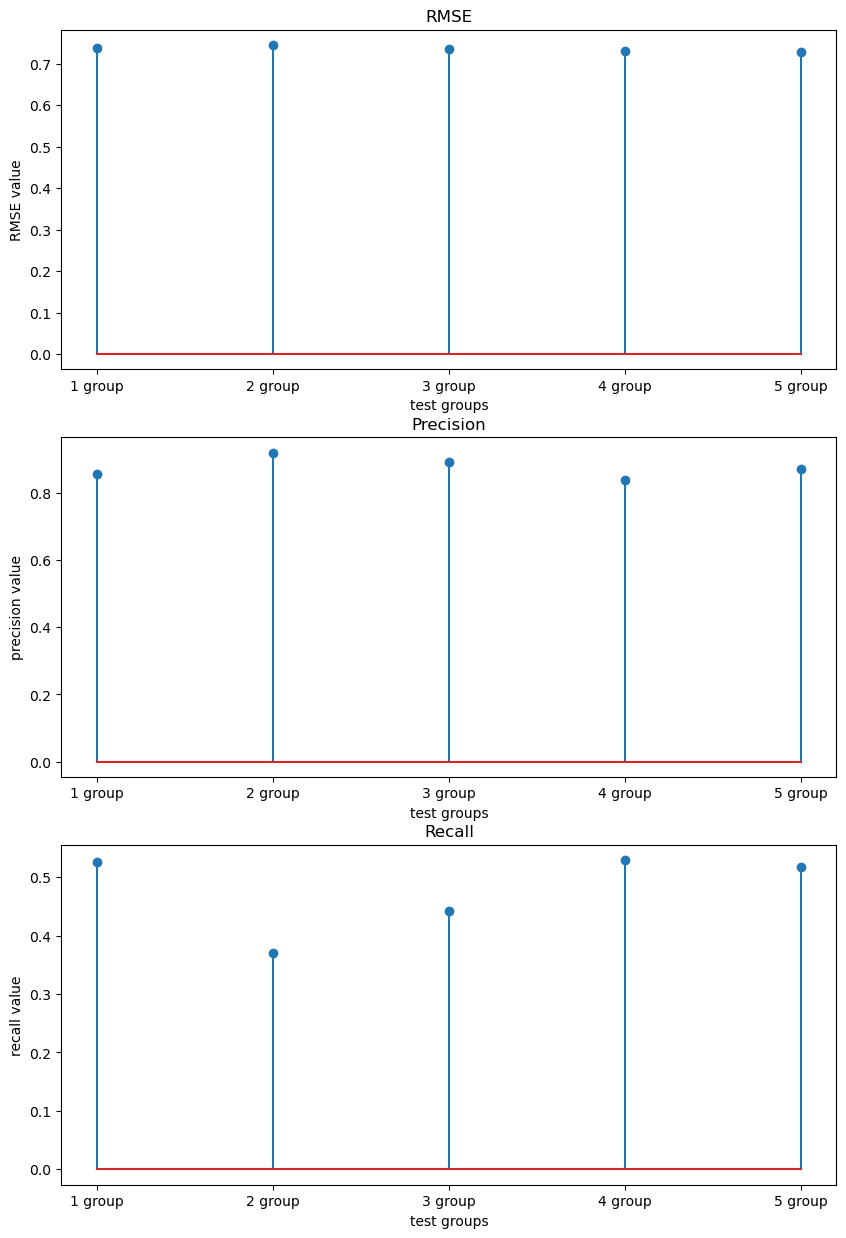

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
rmse_list = [el[0] for el in results]
precision_list = [el[1] for el in results]
recall_list = [el[2] for el in results]
groups = [f"{i+1} group" for i in range(len(results))]
create_stem_plot(
    groups,
    rmse_list,
    ax=axes[0],
    title="RMSE",
    x_label="test groups",
    y_label="RMSE value",
)
create_stem_plot(
    groups,
    precision_list,
    ax=axes[1],
    title="Precision",
    x_label="test groups",
    y_label="precision value",
)
create_stem_plot(
    groups,
    recall_list,
    ax=axes[2],
    title="Recall",
    x_label="test groups",
    y_label="recall value",
)
plt.show()